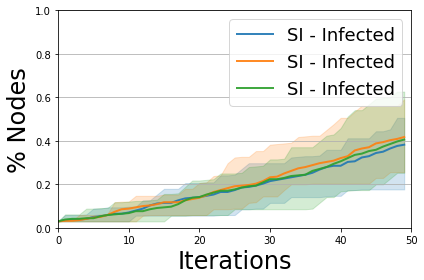

In [3]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIModel as si
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import json

from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")

# Network topology
g = nx.karate_club_graph()

# Model selection
model = si.SIModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)


infected_nodes = [33]
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

# Simulation execution
#iterations = model.iteration_bunch(1000)


trends = multi_runs(model, execution_number=10, iteration_number=50, nprocesses=4)
#trends = model.build_trends(iterations)

# 2° Model selection
model1 = si.SIModel(g)

# 2° Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)

infected_nodes2 = [32]
cfg.add_model_initial_configuration("Infected", infected_nodes2)
model1.set_initial_status(cfg)

# 3° Simulation execution
#iterations = model1.iteration_bunch(1000)
trends1  = multi_runs(model, execution_number=10, iteration_number=50, nprocesses=4)

# 3° Model selection
model2 = si.SIModel(g)

# 3° Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)

infected_nodes3 = [31]
cfg.add_model_initial_configuration("Infected", infected_nodes2)
model1.set_initial_status(cfg)

# 3° Simulation execution
#iterations = model1.iteration_bunch(1000)
trends2  = multi_runs(model, execution_number=10, iteration_number=50, nprocesses=4)

from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model, model1, model2], [trends, trends1, trends2], statuses=['Infected'])
viz.plot()

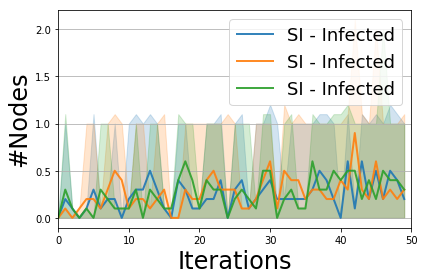

In [4]:
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([model, model1, model2], [trends, trends1, trends2], statuses=['Infected'])
viz.plot()